In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

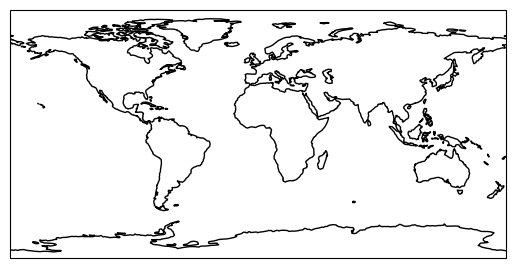

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

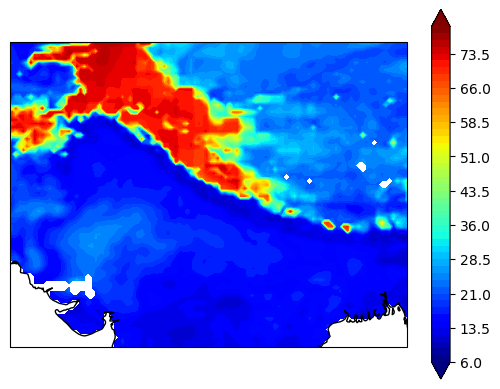

In [3]:
# get the path of the file. It can be found in the repo data directory.
fname = "C:\\Users\\apurv\\Desktop\\Spyder\\GLDAS DATA\\GLDAS_NOAH025_M.A201103.021.nc4"

dataset = Dataset(fname)
alb = dataset.variables['Albedo_inst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
time = dataset.variables['time'][:]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([66, 92, 20, 40], ccrs.PlateCarree())
plt.contourf(lons, lats, alb, 60,
             transform=ccrs.PlateCarree(), cmap = 'jet', extend = 'both')
plt.colorbar(ax =ax)

ax.coastlines()

plt.show()


In [4]:
np.where(lats == 79.375)

(array([557], dtype=int64),)

In [5]:
alb[0:357:557]

masked_array(data=[[--, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --]],
             mask=[[ True,  True,  True, ...,  True,  True,  True]],
       fill_value=-9999.0,
            dtype=float32)

C:\Users\apurv\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


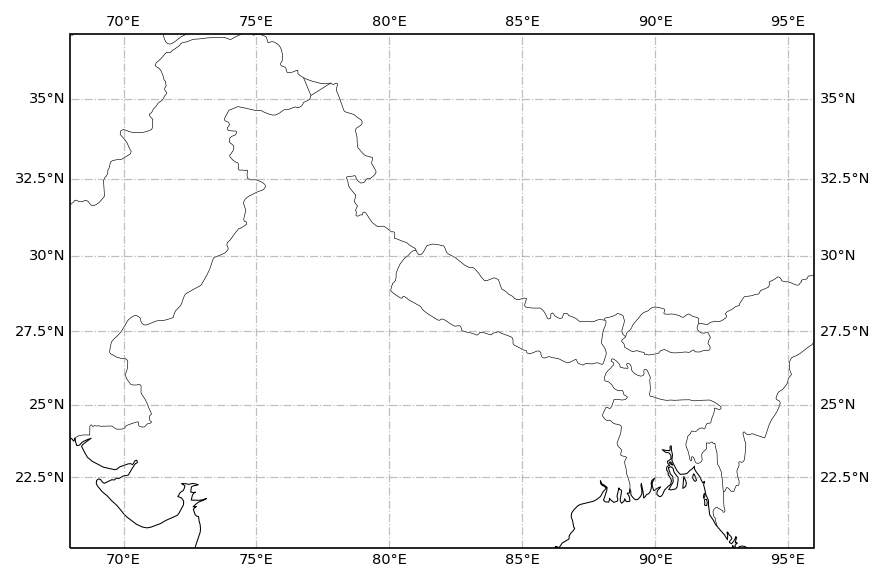

In [9]:
# Open the GLDAS data file
original_data = xr.open_dataset(fname)

# Extract the 2D data to be plotted
data = original_data["Albedo_inst"][0,:,:]

# First we specify Coordinate Refference System for Map Projection
# We will use Mercator, which is a cylindrical, conformal projection. 
# It has bery large distortion at high latitudes, cannot 
# fully reach the polar regions.
projection = ccrs.Mercator()

# Specify CRS, that will be used to tell the code, where should our data be plotted
crs = ccrs.PlateCarree()

# Now we will create axes object having specific projection 
plt.figure(dpi=150)
ax = plt.axes(projection=projection, frameon=True)

# Draw gridlines in degrees over Mercator map
gl = ax.gridlines(crs=crs, draw_labels=True,
                  linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
gl.xlabel_style = {"size" : 7}
gl.ylabel_style = {"size" : 7}

# To plot borders and coastlines, we can use cartopy feature
import cartopy.feature as cf
ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

# Now, we will specify extent of our map in minimum/maximum longitude/latitude
# Note that these values are specified in degrees of longitude and degrees of latitude
# However, we can specify them in any crs that we want, but we need to provide appropriate
# crs argument in ax.set_extent
lon_min = 68
lon_max = 96
lat_min = 20
lat_max = 37

# crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
# plt.title(f"Temperature anomaly over Europe in {original_data.valid_time.dt.strftime('%B %Y').values}")
plt.show()

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def plot_dataset(dataset : xr.Dataset):
    # First we specify Coordinate Refference System for Map Projection
    # We will use Mercator, which is a cylindrical, conformal projection. 
    # It has bery large distortion at high latitudes, cannot 
    # fully reach the polar regions.
    projection = ccrs.Mercator()
    # Specify CRS, that will be used to tell the code, where should our data be plotted
    crs = ccrs.PlateCarree()
    # Now we will create axes object having specific projection 
    plt.figure(figsize=(16,9), dpi=150)
    ax = plt.axes(projection=projection, frameon=True)
    # Draw gridlines in degrees over Mercator map
    gl = ax.gridlines(crs=crs, draw_labels=True,
                    linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
    gl.xlabel_style = {"size" : 7}
    gl.ylabel_style = {"size" : 7}
    # To plot borders and coastlines, we can use cartopy feature
    import cartopy.feature as cf
    ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
    ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
    
    # Now, we will specify extent of our map in minimum/maximum longitude/latitude
    # Note that these values are specified in degrees of longitude and degrees of latitude
    # However, we can specify them in any crs that we want, but we need to provide appropriate
    # crs argument in ax.set_extent
    # crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
    lon_min = 68
    lon_max = 96
    lat_min = 20
    lat_max = 37
   
    ##### WE ADDED THESE LINES #####
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    data.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap = "jet",extend ='both', cbar_kwargs=cbar_kwargs, levels=21)
    ################################
    
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
#     plt.title(f"Temperature anomaly over Europe in {dataset.valid_time.dt.strftime('%B %Y').values}")
    plt.show()



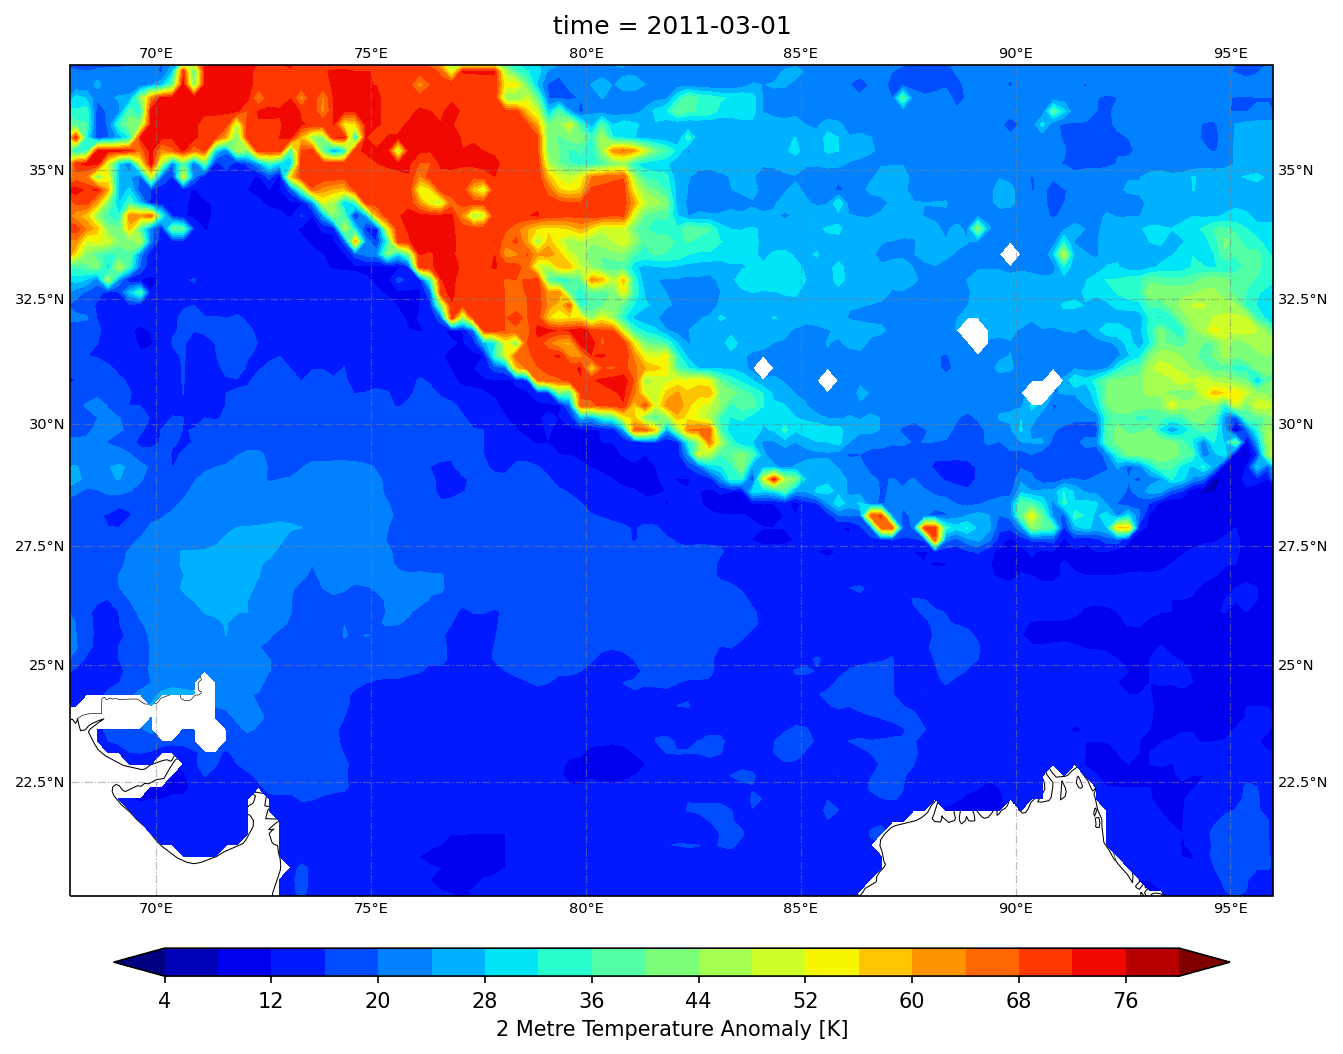

In [11]:
plot_dataset(data)

In [ ]:
original_data

In [ ]:
pathin = r"C:\Users\apurv\Desktop\Spyder\MERRA-2 DATA\Monthly snow depth data\MERRA2_400.tavgM_2d_glc_Nx.201103.nc4"
data = Dataset(pathin)
sd = dataset.variables['SNOWDP_GL'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
time = dataset.variables['time'][:]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
plt.contourf(lons, lats, sd, 100,
             transform=ccrs.PlateCarree(), cmap = 'jet', extend = 'both')
plt.colorbar(ax =ax)

ax.coastlines()

plt.show()

In [ ]:
data['SNOWDP_GL']

In [ ]:
data